In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from itertools import combinations

In [2]:
dfData = pd.read_csv("dataset1.csv").drop(columns = "target")
print(dfData.shape)
print(dfData.columns)
dfData.head()

atributos = [ f'V{x}' for x in range(1,14) ]

def int_to_float(c):
    if isinstance(c, float):
        return c
    else:
        try:
            return float(c)
        except:
            return None

for atributo in atributos:
    dfData[atributo] = dfData[atributo].apply(int_to_float)



(506, 13)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13'],
      dtype='object')


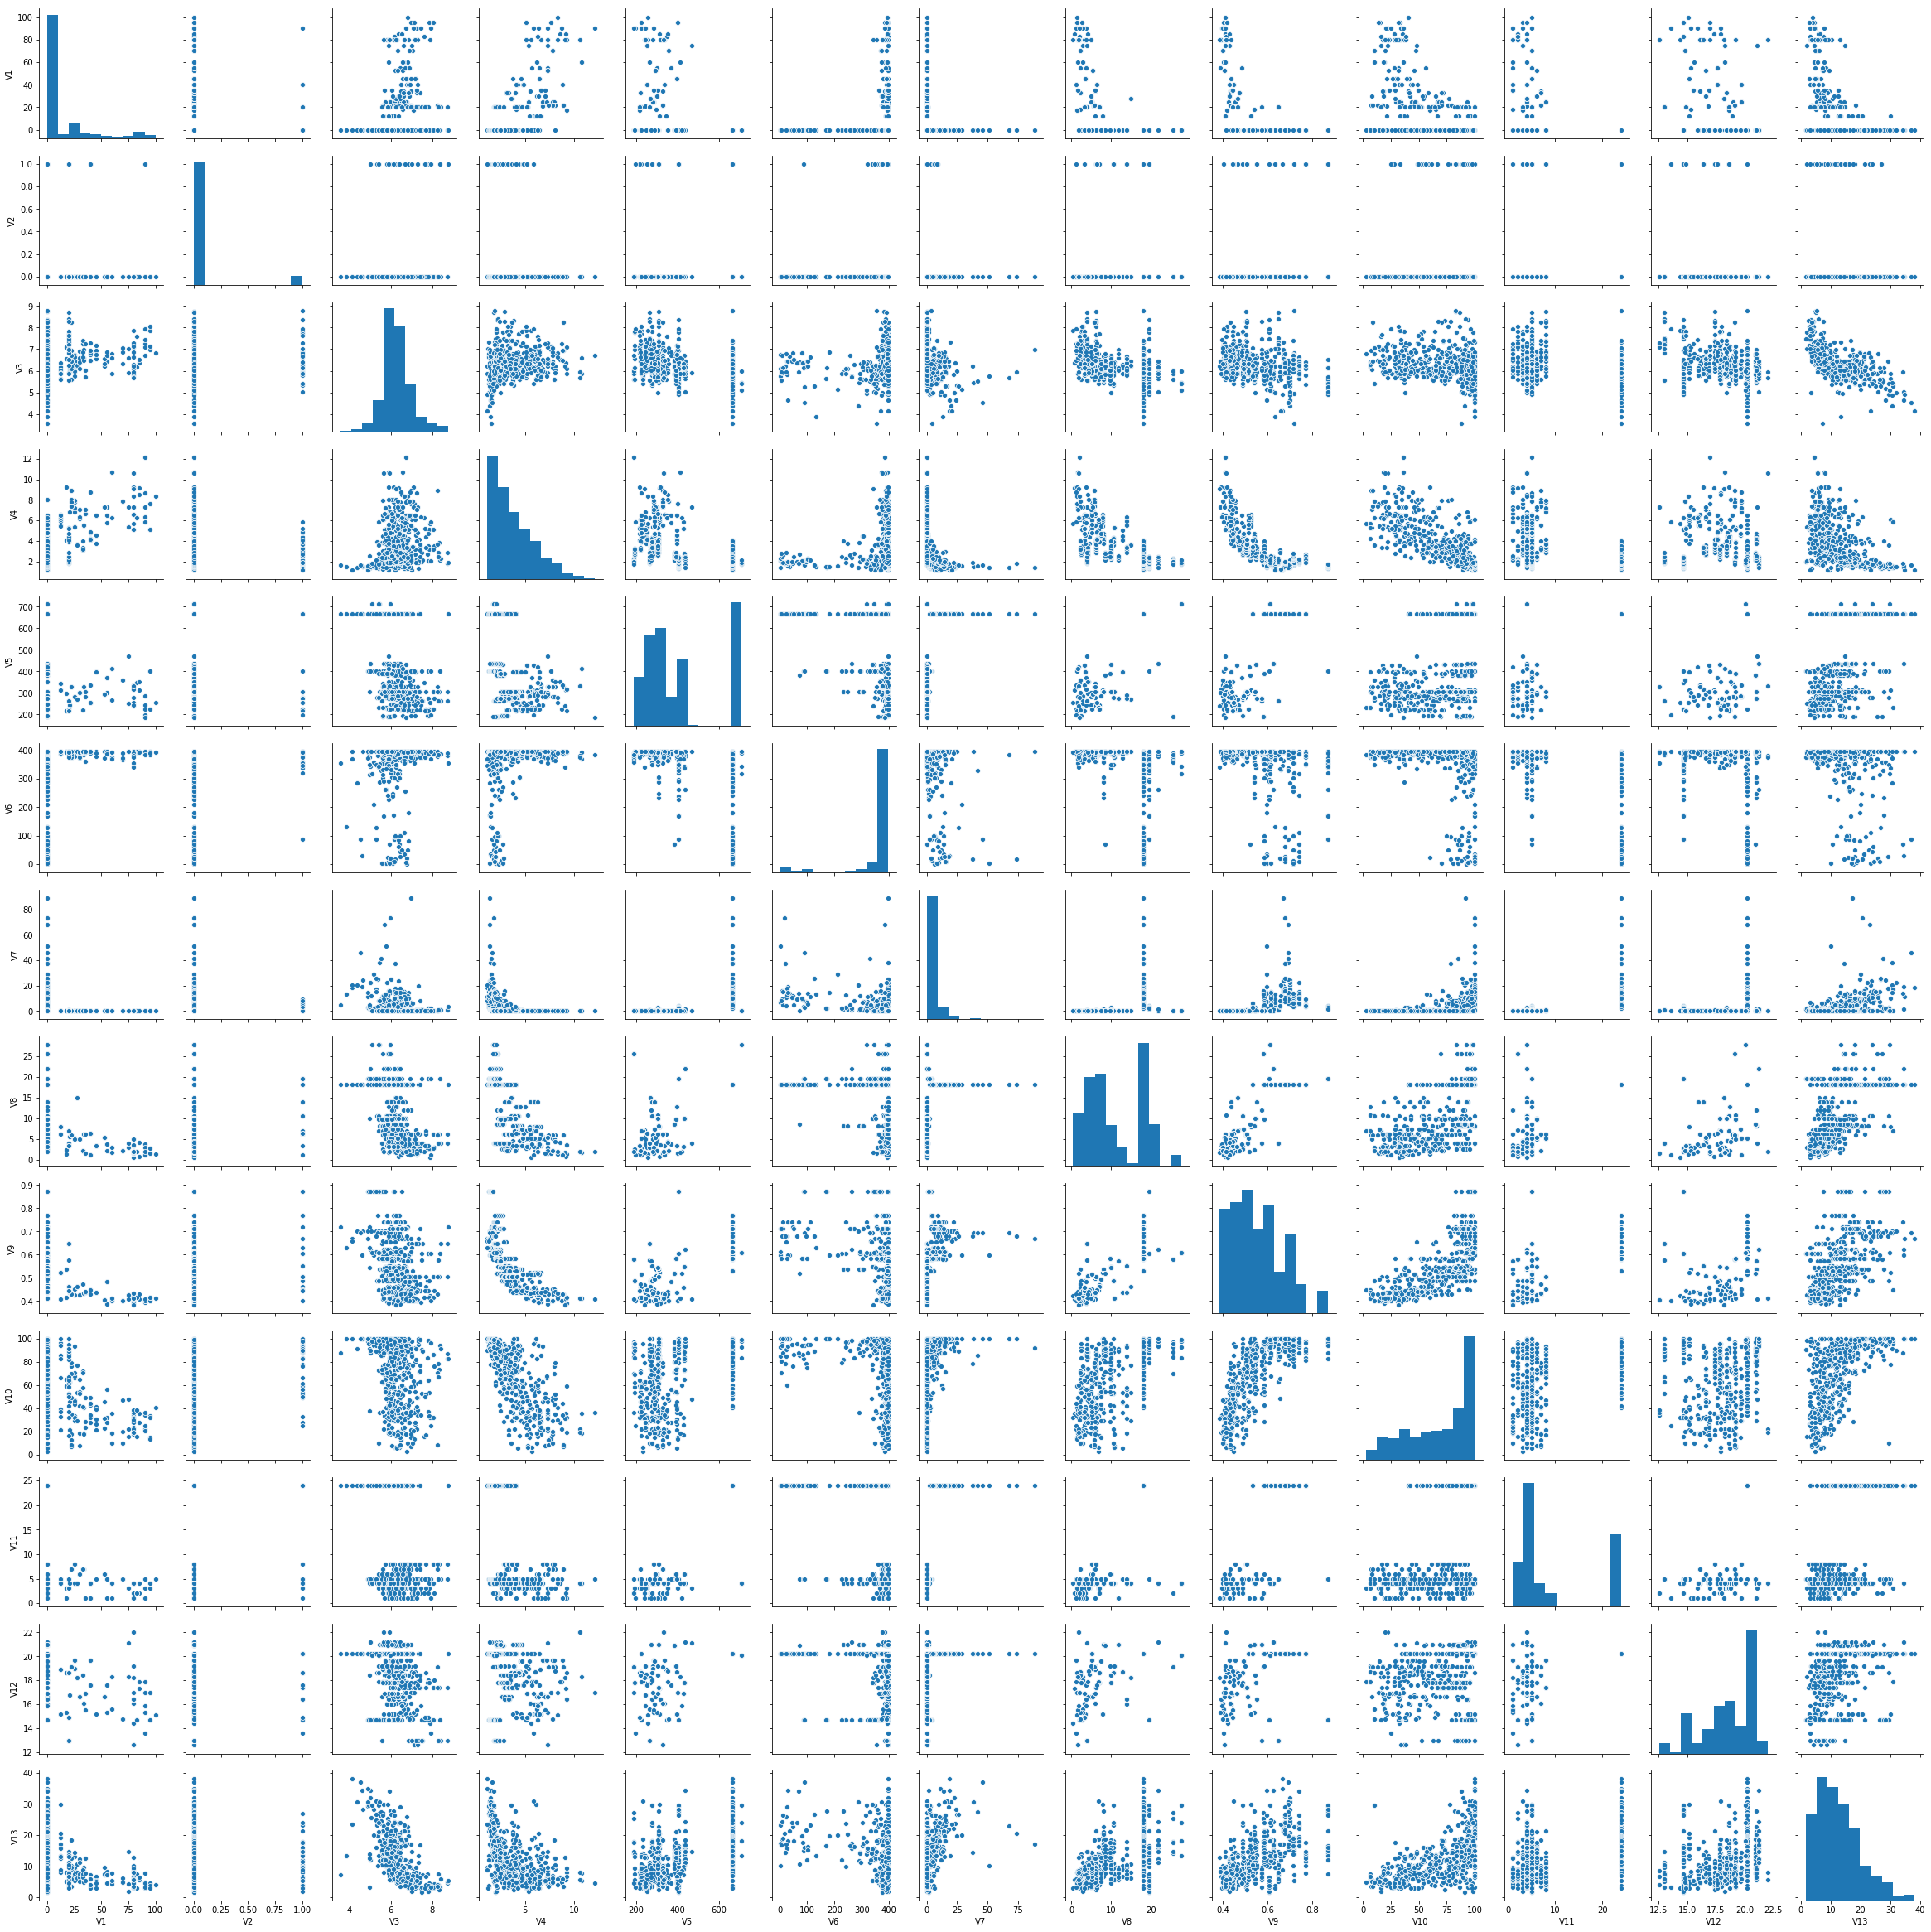

In [3]:
sns.pairplot(dfData)
plt.show()

In [12]:
# OLHAR https://docs.python.org/3/library/itertools.html#itertools.combinations
# usar combinação do itertools e percorer o vetor ao invés de usar os fors
#EXEMPLO itertools:
for i in range(1,len(atributos)+1):
    comb = list(combinations(atributos,i)) # nao precisa transformar em list, combinations retorna um iterador
    print(f"numero de combinaçoes com {i} elementos = {len(comb)}") # transformei pra list so pra imprimir o len
    # ficaria:
    #for comb in combinations(atributos,i):
    #    newData = [data[x] for x in comb]
print('comb:', list(comb))

#exemplo de criação do df apartir de uma combinação
for comb in combinations(atributos,13):
    newDf = dfData.filter(comb,axis=1)  # copiando apenas os atributos que vamos usar

print(newDf.head())

numero de combinaçoes com 1 elementos = 13
numero de combinaçoes com 2 elementos = 78
numero de combinaçoes com 3 elementos = 286
numero de combinaçoes com 4 elementos = 715
numero de combinaçoes com 5 elementos = 1287
numero de combinaçoes com 6 elementos = 1716
numero de combinaçoes com 7 elementos = 1716
numero de combinaçoes com 8 elementos = 1287
numero de combinaçoes com 9 elementos = 715
numero de combinaçoes com 10 elementos = 286
numero de combinaçoes com 11 elementos = 78
numero de combinaçoes com 12 elementos = 13
numero de combinaçoes com 13 elementos = 1
comb: [('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13')]
     V1   V2     V3      V4     V5      V6       V7    V8     V9   V10  V11  \
0  18.0  0.0  6.575  4.0900  296.0  396.90  0.00632  2.31  0.538  65.2  1.0   
1   0.0  0.0  6.421  4.9671  242.0  396.90  0.02731  7.07  0.469  78.9  2.0   
2   0.0  0.0  7.185  4.9671  242.0  392.83  0.02729  7.07  0.469  61.1  2.0   
3   0.0  0.0  6.998

In [14]:
np.random.seed(1001001)


#
sample_size=150

# 
best_sil = -999

data = dfData

for init in ['k-means++', 'random']:
    for k in range(3,8):
        estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
        for i in range(1,len(atributos)+1):
            for comb in combinations(atributos,i):
                newDf = dfData.filter(comb,axis=1)  # copiando apenas os atributos que vamos usar
                data = scale(newDf)
                estimator.fit(data)
                data = scale(dfData)
                sil = metrics.silhouette_score(data, estimator.labels_,
                                               metric="euclidean",
                                               sample_size=sample_size)
                if sil > best_sil:
                    bestEstimator = estimator
                    bestSil = sil
                    bestComb = comb
                
print('better estimator silhouette: %0.4f (%d clusters, %s)' % (bestSil, bestEstimator.n_clusters, bestEstimator.init))
print(bestComb)
dfData['label'] = bestEstimator.labels_

C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Yan\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct

better estimator silhouette: 0.3175 (7 clusters, random)
('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13')


NameError: name 'best_estimator' is not defined

In [6]:
np.random.seed(1001001)


#
sample_size=150

# 
best_sil = -999

data = dfData

for init in ['k-means++', 'random']:
    for k in range(3,8):
        estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
        for v1 in [0,1]:
            for v2 in [0,1]:
                for v3 in [0,1]:
                    for v4 in [0,1]:
                        for v5 in [0,1]:
                            for v6 in [0,1]:
                                for v7 in [0,1]:
                                    for v8 in [0,1]:
                                        for v9 in [0,1]:
                                            for v10 in [0,1]:
                                                for v11 in [0,1]:
                                                    for v12 in [0,1]:
                                                        for v13 in [0,1]:
                                                            data = dfData
                                                            if v1 == 0:
                                                                data = data.drop(columns = "V1")
                                                            if v2 == 0:
                                                                data = data.drop(columns = "V2")
                                                            if v3 == 0:
                                                                data = data.drop(columns = "V3")
                                                            if v4 == 0:
                                                                data = data.drop(columns = "V4")
                                                            if v5 == 0:
                                                                data = data.drop(columns = "V5")
                                                            if v6 == 0:
                                                                data = data.drop(columns = "V6")
                                                            if v7 == 0:
                                                                data = data.drop(columns = "V7")
                                                            if v8 == 0:
                                                                data = data.drop(columns = "V8")
                                                            if v9 == 0:
                                                                data = data.drop(columns = "V9")
                                                            if v10 == 0:
                                                                data = data.drop(columns = "V10")
                                                            if v11 == 0:
                                                                data = data.drop(columns = "V11")
                                                            if v12 == 0:
                                                                data = data.drop(columns = "V12")
                                                            if v13 == 0:     
                                                                data = data.drop(columns = "V13")
                                                            if v1==0 and v2==0 and v3==0 and v4==0 and v5==0 and v6==0 and v7==0 and v8==0 and v9==0 and v10==0 and v11==0 and v12==0 and v13==0:
                                                                print("Sem atributos")
                                                                continue
                                                            data = scale(data)
                                                            estimator.fit(data)
                                                            data = scale(dfData)
                                                            sil = metrics.silhouette_score(data, estimator.labels_,
                                                                                            metric="euclidean",
                                                                                            sample_size=sample_size)
                                                            #print('%-10s, k=%d: sil=%0.4f' % (init, k, sil))
                                                            #print("%d %d %d %d %d %d %d %d %d %d %d %d %d " % (v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13))
                                                            if sil > best_sil:
                                                                best_estimator = estimator
                                                                best_sil = sil
                                                                bestV1 = v1
                                                                bestV2 = v2
                                                                bestV3 = v3
                                                                bestV4 = v4
                                                                bestV5 = v5
                                                                bestV6 = v6
                                                                bestV7 = v7
                                                                bestV8 = v8
                                                                bestV9 = v9
                                                                bestV10 = v10
                                                                bestV11 = v11
                                                                bestV12 = v12
                                                                bestV13 = v13

print('better estimator silhouette: %0.4f (%d clusters, %s)' % (best_sil, best_estimator.n_clusters, best_estimator.init))
print("%d %d %d %d %d %d %d %d %d %d %d %d %d " % (bestV1, bestV2, bestV3, bestV4, bestV5, bestV6, bestV7, bestV8, bestV9, bestV10, bestV11, bestV12, bestV13))
dfData['label'] = best_estimator.labels_

Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
Sem atributos
better estimator silhouette: 0.4098 (3 clusters, k-means++)
1 1 0 0 1 1 1 0 1 0 0 1 0 


In [ ]:
sns.pairplot(data=dfData, vars=['V1'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V2'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V3'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V4'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V5'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V6'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V7'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V8'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V9'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V10'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V11'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V12'], hue='label')
plt.show()
sns.pairplot(data=dfData, vars=['V13'], hue='label')
plt.show()